<a href="https://colab.research.google.com/github/gurusurya946/FML/blob/main/linear%20reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
data=pd.read_csv('Company_data.csv')

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

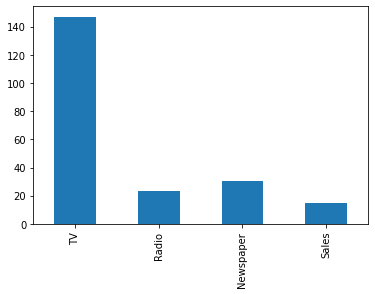

In [ ]:
data.describe().loc['mean'].plot.bar()
plt.show()

<ipython-input-29-5bd3f3cbc0d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'],bins=30)


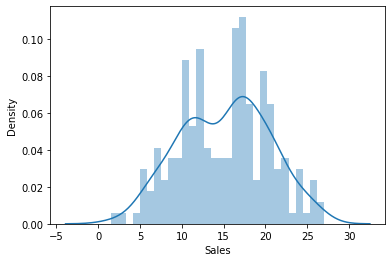

In [ ]:
sns.distplot(data['Sales'],bins=30)
plt.show()

In [ ]:
d=data.corr()

In [ ]:
data.shape

(200, 4)

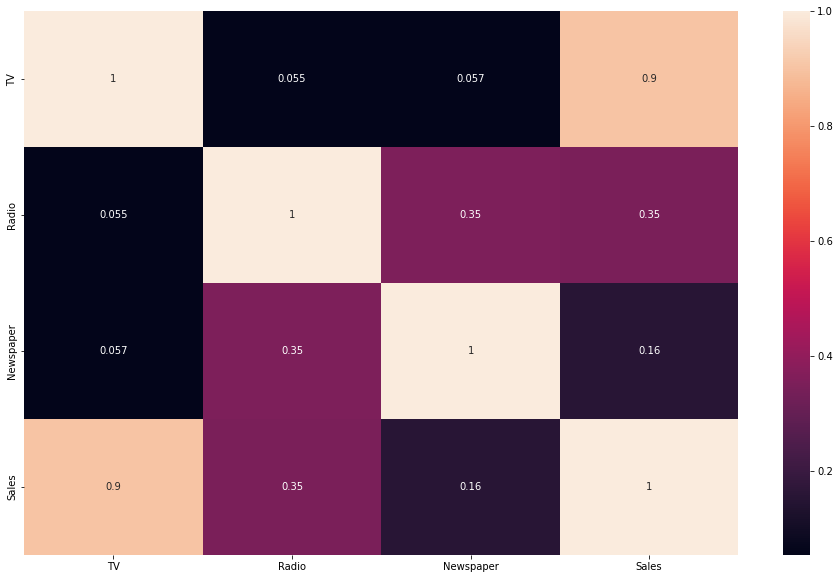

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(d, annot=True)
plt.show()

In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [38]:
from sklearn import linear_model
X=data.drop('Sales',axis=1).values
y=data['Sales'].values

In [48]:
X_TV= X[:, 0]


In [49]:
type(X_TV)
type(y)

numpy.ndarray

In [50]:
X_TV.shape , y.shape

((200,), (200,))

In [54]:
X_TV=X_TV.reshape(-1,1)
y=y.reshape(-1,1)

In [55]:
X_TV.shape , y.shape

((200, 1), (200, 1))

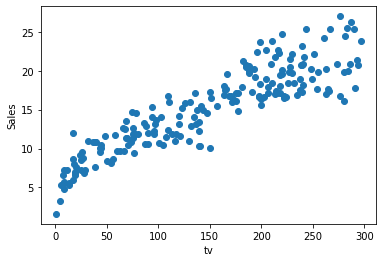

In [57]:
plt.scatter(X_TV,y)
plt.xlabel('tv')
plt.ylabel('Sales')
plt.show()

In [58]:
reg=linear_model.LinearRegression()
reg.fit(X_TV,y)

LinearRegression()

In [59]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred = reg.predict(X_TV)

print(f'MAE = {mean_absolute_error(y, y_pred)}')
print(f'MSE = {mean_squared_error(y, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y, y_pred))}')
print(f'R_2 = {r2_score(y, y_pred)}')

MAE = 1.8305872641932412
MSE = 5.2177438977951285
RMSE = 2.2842381438447106
R_2 = 0.8121757029987414


In [68]:
prediction_space = np.linspace(min(X_TV), max(X_TV)).reshape(-1,1)


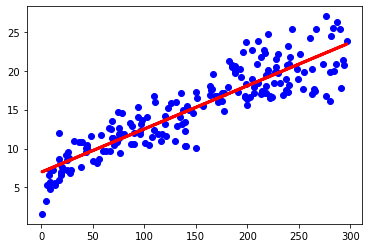

In [69]:
plt.scatter(X_TV, y, color='blue')
plt.plot(X_TV, reg.predict(X_TV), color='red', linewidth=3)
plt.show()

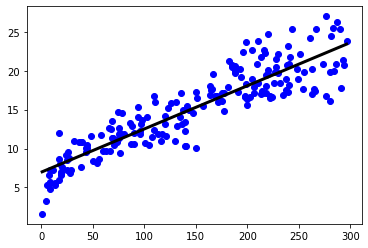

In [70]:
plt.scatter(X_TV, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()
     

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
print(f'Train-X = {X_train} \nTrain-y = {y_train}')
print(f'Test-X = {X_test} \nTest-y = {y_test}')
     

Train-X = [[139.2  14.3  25.6]
 [139.3  14.5  10.2]
 [  5.4  29.9   9.4]
 [293.6  27.7   1.8]
 [281.4  39.6  55.8]
 [  8.7  48.9  75. ]
 [ 80.2   0.    9.2]
 [137.9  46.4  59. ]
 [227.2  15.8  49.9]
 [ 31.5  24.6   2.2]
 [262.7  28.8  15.9]
 [213.5  43.   33.8]
 [287.6  43.   71.8]
 [ 11.7  36.9  45.2]
 [ 17.9  37.6  21.6]
 [209.6  20.6  10.7]
 [ 23.8  35.1  65.9]
 [ 76.4   0.8  14.8]
 [250.9  36.5  72.3]
 [141.3  26.8  46.2]
 [187.8  21.1   9.5]
 [134.3   4.9   9.3]
 [239.8   4.1  36.9]
 [224.    2.4  15.6]
 [ 75.5  10.8   6. ]
 [ 97.5   7.6   7.2]
 [ 75.3  20.3  32.5]
 [  8.4  27.2   2.1]
 [191.1  28.7  18.2]
 [175.1  22.5  31.5]
 [135.2  41.7  45.9]
 [266.9  43.8   5. ]
 [ 85.7  35.8  49.3]
 [139.5   2.1  26.6]
 [171.3  39.7  37.7]
 [187.9  17.2  17.9]
 [ 38.2   3.7  13.8]
 [177.    9.3   6.4]
 [ 38.   40.3  11.9]
 [168.4   7.1  12.8]
 [ 16.9  43.7  89.4]
 [237.4   5.1  23.5]
 [ 28.6   1.5  33. ]
 [197.6  23.3  14.2]
 [ 17.2  45.9  69.3]
 [199.1  30.6  38.7]
 [193.2  18.4  65.7]
 [2